# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

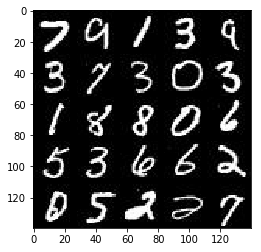

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

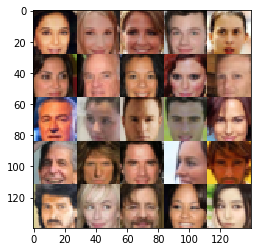

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input_images = tf.placeholder(tf.float32,shape=(None,image_width,image_height,image_channels))
    z = tf.placeholder(tf.float32,shape=(None,z_dim))
    lr = tf.placeholder(tf.float32,shape=None)

    return real_input_images, z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [15]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        alpha = 0.01
        # Input layer is 28x28x3
        
        x2 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        #print(x2.get_shape())
        x2 = tf.layers.batch_normalization(x2,training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        x5 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        #print(x5.get_shape())
        x5 = tf.layers.batch_normalization(x5,training=True)
        x5 = tf.maximum(alpha * x5, x5)
        #7x7x256
        
        x6 = tf.layers.conv2d(x5, 512, 5, strides=2, padding='same')
        #print(x6.get_shape())
        x6 = tf.layers.batch_normalization(x6,training=True)
        x6 = tf.maximum(alpha * x6, x6)
        
        # Flatten it
        flat = tf.reshape(x6, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        out = tf.nn.dropout(out,keep_prob=0.95)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
        alpha = 0.1
        x1 = tf.layers.dense(z,7*7*512)
        #reshaping to 4d tensor
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.get_shape())
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.get_shape())
        
        
        logits = tf.layers.conv2d_transpose(x2,out_channel_dim,5,strides=2,padding='same')
        #print(logits.get_shape())
        #28x28x5
        out = tf.tanh(logits)        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gen_model = generator(input_z,out_channel_dim)
    dis_model_real,dis_logits_real = discriminator(input_real)
    dis_model_fake,dis_logits_fake = discriminator(gen_model,True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real,labels=0.9 * tf.ones_like(dis_model_real)))
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake,labels=tf.zeros_like(dis_model_fake)))
    dis_loss = dis_loss_real + dis_loss_fake
        
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake,labels=tf.ones_like(dis_model_fake)))
    
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    model_vars = tf.trainable_variables()
    gen_vars = [v1 for v1 in model_vars if v1.name.startswith('generator')]
    dis_vars = [v1 for v1 in model_vars if v1.name.startswith('discriminator')]

    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    show_every = 50
    print_every = 10
    print(data_shape)
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, len(data_image_mode))
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        losses = []
        step = 0 
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                #print(batch_images)
                step = step+1
                batch_images = batch_images * 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real:batch_images, input_z:batch_z,lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})


                if step % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if step % show_every == 0:
                    show_generator_output(sess,20,input_z,data_shape[3],data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 4.0932... Generator Loss: 0.0318
Epoch 1/2... Discriminator Loss: 2.0795... Generator Loss: 0.6152
Epoch 1/2... Discriminator Loss: 2.0735... Generator Loss: 0.3008
Epoch 1/2... Discriminator Loss: 2.2024... Generator Loss: 0.2172
Epoch 1/2... Discriminator Loss: 2.1370... Generator Loss: 0.2158


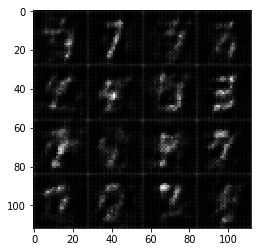

Epoch 1/2... Discriminator Loss: 2.0395... Generator Loss: 0.2386
Epoch 1/2... Discriminator Loss: 1.8415... Generator Loss: 0.3231
Epoch 1/2... Discriminator Loss: 1.7863... Generator Loss: 0.3188
Epoch 1/2... Discriminator Loss: 1.8116... Generator Loss: 0.3216
Epoch 1/2... Discriminator Loss: 1.9975... Generator Loss: 0.2394


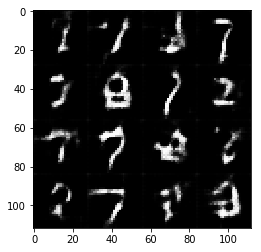

Epoch 1/2... Discriminator Loss: 1.8543... Generator Loss: 0.2915
Epoch 1/2... Discriminator Loss: 1.7705... Generator Loss: 0.3144
Epoch 1/2... Discriminator Loss: 1.8135... Generator Loss: 0.3038
Epoch 1/2... Discriminator Loss: 1.7648... Generator Loss: 0.3266
Epoch 1/2... Discriminator Loss: 1.9793... Generator Loss: 0.2402


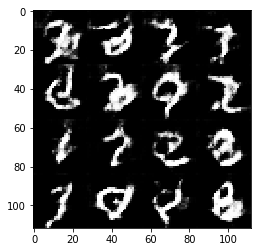

Epoch 1/2... Discriminator Loss: 1.5882... Generator Loss: 0.4861
Epoch 1/2... Discriminator Loss: 1.7947... Generator Loss: 0.3085
Epoch 1/2... Discriminator Loss: 1.8290... Generator Loss: 0.3088
Epoch 1/2... Discriminator Loss: 1.7422... Generator Loss: 0.3421
Epoch 1/2... Discriminator Loss: 1.8405... Generator Loss: 0.2871


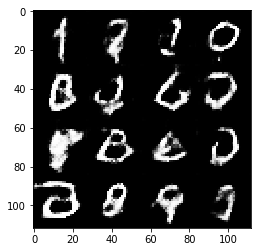

Epoch 1/2... Discriminator Loss: 1.6398... Generator Loss: 0.4419
Epoch 1/2... Discriminator Loss: 1.8004... Generator Loss: 0.3029
Epoch 1/2... Discriminator Loss: 1.7480... Generator Loss: 0.3533
Epoch 1/2... Discriminator Loss: 1.6694... Generator Loss: 0.3931
Epoch 1/2... Discriminator Loss: 1.7576... Generator Loss: 0.3384


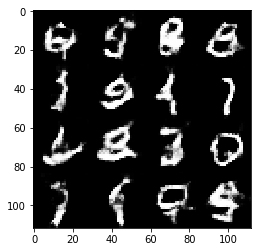

Epoch 1/2... Discriminator Loss: 1.5893... Generator Loss: 0.4431
Epoch 1/2... Discriminator Loss: 1.6201... Generator Loss: 0.4564
Epoch 1/2... Discriminator Loss: 1.8157... Generator Loss: 0.3133
Epoch 1/2... Discriminator Loss: 1.7609... Generator Loss: 0.3263
Epoch 1/2... Discriminator Loss: 1.7688... Generator Loss: 0.3204


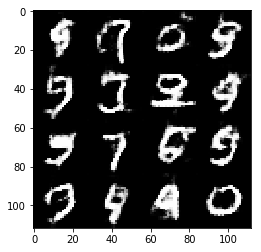

Epoch 1/2... Discriminator Loss: 1.7604... Generator Loss: 0.3215
Epoch 1/2... Discriminator Loss: 1.8677... Generator Loss: 0.2700
Epoch 1/2... Discriminator Loss: 1.5843... Generator Loss: 0.4759
Epoch 1/2... Discriminator Loss: 1.5557... Generator Loss: 0.8630
Epoch 1/2... Discriminator Loss: 1.5399... Generator Loss: 0.5347


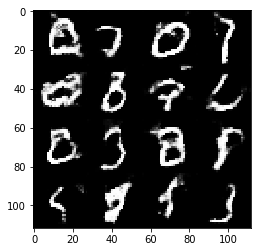

Epoch 1/2... Discriminator Loss: 1.7704... Generator Loss: 0.3205
Epoch 1/2... Discriminator Loss: 1.7350... Generator Loss: 0.3249
Epoch 1/2... Discriminator Loss: 1.5990... Generator Loss: 0.4038
Epoch 1/2... Discriminator Loss: 1.5237... Generator Loss: 0.5032
Epoch 1/2... Discriminator Loss: 1.8433... Generator Loss: 0.2836


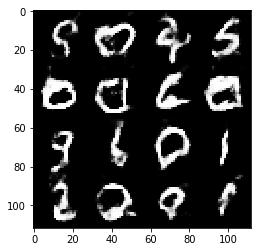

Epoch 1/2... Discriminator Loss: 1.7086... Generator Loss: 0.3541
Epoch 1/2... Discriminator Loss: 1.8094... Generator Loss: 0.2927
Epoch 1/2... Discriminator Loss: 1.6023... Generator Loss: 0.4364
Epoch 1/2... Discriminator Loss: 1.6970... Generator Loss: 0.3699
Epoch 1/2... Discriminator Loss: 1.3913... Generator Loss: 0.6747


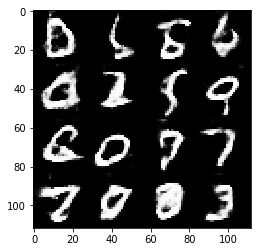

Epoch 1/2... Discriminator Loss: 2.1620... Generator Loss: 1.8641
Epoch 1/2... Discriminator Loss: 1.5894... Generator Loss: 1.2984
Epoch 1/2... Discriminator Loss: 1.4388... Generator Loss: 1.0068
Epoch 1/2... Discriminator Loss: 1.5156... Generator Loss: 1.2633
Epoch 1/2... Discriminator Loss: 1.3911... Generator Loss: 0.7510


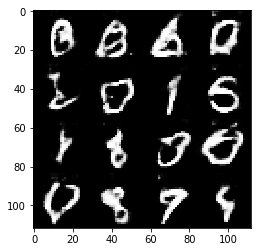

Epoch 1/2... Discriminator Loss: 1.5226... Generator Loss: 1.2345
Epoch 1/2... Discriminator Loss: 1.5446... Generator Loss: 1.2459
Epoch 1/2... Discriminator Loss: 1.3751... Generator Loss: 0.6716
Epoch 1/2... Discriminator Loss: 1.5109... Generator Loss: 1.0572
Epoch 1/2... Discriminator Loss: 1.5992... Generator Loss: 1.2381


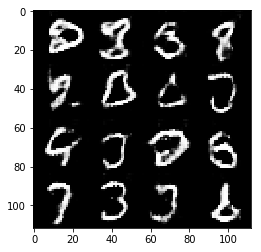

Epoch 1/2... Discriminator Loss: 1.6162... Generator Loss: 1.3405
Epoch 1/2... Discriminator Loss: 1.3528... Generator Loss: 0.8647
Epoch 1/2... Discriminator Loss: 1.6183... Generator Loss: 0.3725
Epoch 1/2... Discriminator Loss: 1.6058... Generator Loss: 0.3723
Epoch 1/2... Discriminator Loss: 1.3295... Generator Loss: 0.5885


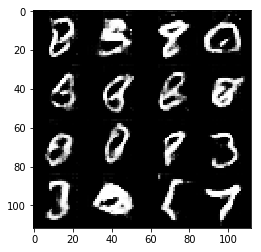

Epoch 1/2... Discriminator Loss: 1.5252... Generator Loss: 1.3609
Epoch 1/2... Discriminator Loss: 1.4134... Generator Loss: 0.9916
Epoch 1/2... Discriminator Loss: 1.4019... Generator Loss: 1.1016
Epoch 1/2... Discriminator Loss: 1.3391... Generator Loss: 0.6980
Epoch 1/2... Discriminator Loss: 2.1983... Generator Loss: 0.1808


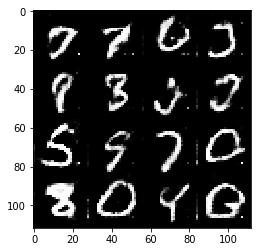

Epoch 1/2... Discriminator Loss: 1.4180... Generator Loss: 0.5330
Epoch 1/2... Discriminator Loss: 1.5852... Generator Loss: 0.3840
Epoch 1/2... Discriminator Loss: 1.3933... Generator Loss: 0.5539
Epoch 1/2... Discriminator Loss: 1.2823... Generator Loss: 0.7922
Epoch 1/2... Discriminator Loss: 1.6134... Generator Loss: 1.7636


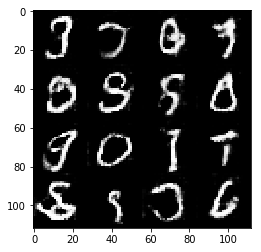

Epoch 1/2... Discriminator Loss: 1.3484... Generator Loss: 0.8644
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 1.1763
Epoch 1/2... Discriminator Loss: 1.9470... Generator Loss: 1.8349
Epoch 1/2... Discriminator Loss: 1.3715... Generator Loss: 1.1699
Epoch 1/2... Discriminator Loss: 1.2158... Generator Loss: 0.9232


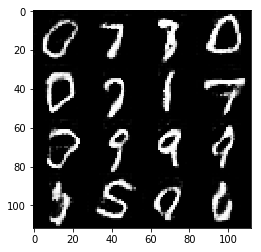

Epoch 1/2... Discriminator Loss: 1.2823... Generator Loss: 1.2316
Epoch 1/2... Discriminator Loss: 1.2456... Generator Loss: 1.0151
Epoch 1/2... Discriminator Loss: 1.4996... Generator Loss: 1.5441
Epoch 1/2... Discriminator Loss: 1.5962... Generator Loss: 1.6406
Epoch 1/2... Discriminator Loss: 1.4020... Generator Loss: 0.5404


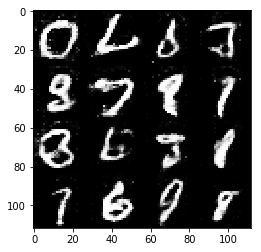

Epoch 1/2... Discriminator Loss: 1.4831... Generator Loss: 0.4139
Epoch 1/2... Discriminator Loss: 1.2717... Generator Loss: 0.6063
Epoch 1/2... Discriminator Loss: 1.3258... Generator Loss: 0.6747
Epoch 1/2... Discriminator Loss: 1.8261... Generator Loss: 0.2748
Epoch 1/2... Discriminator Loss: 1.6917... Generator Loss: 0.3099


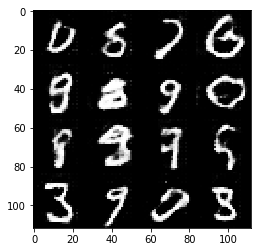

Epoch 1/2... Discriminator Loss: 1.3422... Generator Loss: 0.5445
Epoch 1/2... Discriminator Loss: 1.2654... Generator Loss: 0.6473
Epoch 1/2... Discriminator Loss: 1.3253... Generator Loss: 0.5945
Epoch 1/2... Discriminator Loss: 1.3983... Generator Loss: 1.4565
Epoch 1/2... Discriminator Loss: 1.2342... Generator Loss: 1.0676


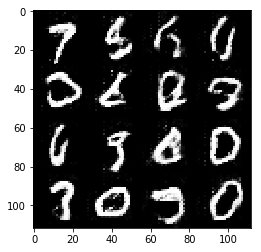

Epoch 1/2... Discriminator Loss: 1.2441... Generator Loss: 0.9284
Epoch 1/2... Discriminator Loss: 1.4738... Generator Loss: 1.7637
Epoch 1/2... Discriminator Loss: 1.2000... Generator Loss: 0.9281
Epoch 2/2... Discriminator Loss: 1.2391... Generator Loss: 0.6229
Epoch 2/2... Discriminator Loss: 1.9272... Generator Loss: 0.2478


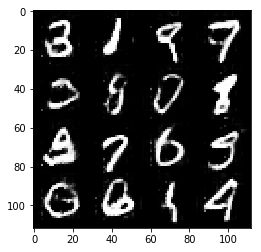

Epoch 2/2... Discriminator Loss: 1.4901... Generator Loss: 0.4239
Epoch 2/2... Discriminator Loss: 1.3812... Generator Loss: 0.6390
Epoch 2/2... Discriminator Loss: 1.2004... Generator Loss: 0.7054
Epoch 2/2... Discriminator Loss: 1.1431... Generator Loss: 1.3627
Epoch 2/2... Discriminator Loss: 1.6270... Generator Loss: 1.4055


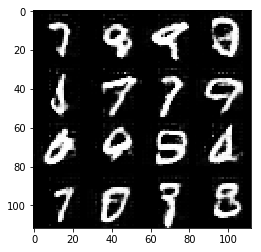

Epoch 2/2... Discriminator Loss: 1.4500... Generator Loss: 1.7160
Epoch 2/2... Discriminator Loss: 1.6578... Generator Loss: 0.3446
Epoch 2/2... Discriminator Loss: 1.2276... Generator Loss: 1.2289
Epoch 2/2... Discriminator Loss: 1.3109... Generator Loss: 1.1227
Epoch 2/2... Discriminator Loss: 1.5069... Generator Loss: 0.5228


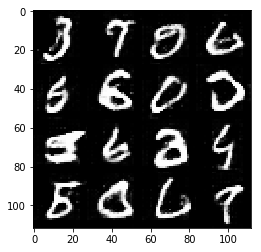

Epoch 2/2... Discriminator Loss: 1.5070... Generator Loss: 0.4813
Epoch 2/2... Discriminator Loss: 1.5599... Generator Loss: 0.3839
Epoch 2/2... Discriminator Loss: 1.3259... Generator Loss: 0.6939
Epoch 2/2... Discriminator Loss: 1.3383... Generator Loss: 0.6066
Epoch 2/2... Discriminator Loss: 1.3938... Generator Loss: 0.5099


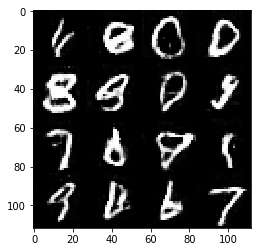

Epoch 2/2... Discriminator Loss: 1.4646... Generator Loss: 0.4497
Epoch 2/2... Discriminator Loss: 1.7822... Generator Loss: 0.3106
Epoch 2/2... Discriminator Loss: 1.2214... Generator Loss: 0.9816
Epoch 2/2... Discriminator Loss: 1.4675... Generator Loss: 1.6017
Epoch 2/2... Discriminator Loss: 1.3496... Generator Loss: 0.8036


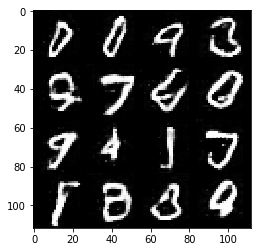

Epoch 2/2... Discriminator Loss: 1.1529... Generator Loss: 1.1541
Epoch 2/2... Discriminator Loss: 1.4547... Generator Loss: 1.1797
Epoch 2/2... Discriminator Loss: 1.6524... Generator Loss: 1.6465
Epoch 2/2... Discriminator Loss: 1.3569... Generator Loss: 0.7610
Epoch 2/2... Discriminator Loss: 1.2791... Generator Loss: 0.7291


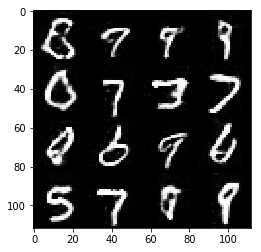

Epoch 2/2... Discriminator Loss: 1.6685... Generator Loss: 0.3680
Epoch 2/2... Discriminator Loss: 1.7189... Generator Loss: 0.3138
Epoch 2/2... Discriminator Loss: 1.5518... Generator Loss: 1.3187
Epoch 2/2... Discriminator Loss: 1.3894... Generator Loss: 0.9789
Epoch 2/2... Discriminator Loss: 1.2218... Generator Loss: 0.9819


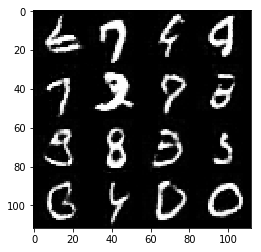

Epoch 2/2... Discriminator Loss: 1.3638... Generator Loss: 1.2133
Epoch 2/2... Discriminator Loss: 1.3826... Generator Loss: 0.7852
Epoch 2/2... Discriminator Loss: 1.2856... Generator Loss: 0.6642
Epoch 2/2... Discriminator Loss: 1.7298... Generator Loss: 0.4975
Epoch 2/2... Discriminator Loss: 1.8112... Generator Loss: 0.2950


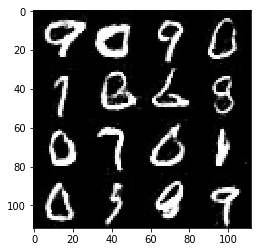

Epoch 2/2... Discriminator Loss: 1.6563... Generator Loss: 0.3351
Epoch 2/2... Discriminator Loss: 1.4541... Generator Loss: 0.4582
Epoch 2/2... Discriminator Loss: 1.3679... Generator Loss: 0.9673
Epoch 2/2... Discriminator Loss: 1.3511... Generator Loss: 0.7429
Epoch 2/2... Discriminator Loss: 1.8861... Generator Loss: 0.2537


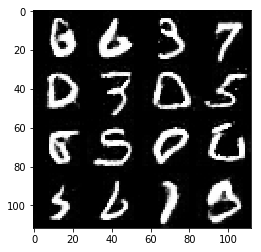

Epoch 2/2... Discriminator Loss: 1.6246... Generator Loss: 0.3654
Epoch 2/2... Discriminator Loss: 1.6554... Generator Loss: 0.3431
Epoch 2/2... Discriminator Loss: 1.5895... Generator Loss: 0.3651
Epoch 2/2... Discriminator Loss: 1.3335... Generator Loss: 0.5479
Epoch 2/2... Discriminator Loss: 1.4027... Generator Loss: 0.7439


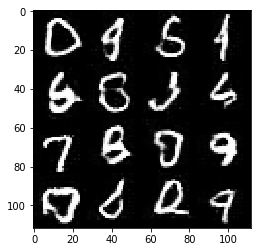

Epoch 2/2... Discriminator Loss: 1.2444... Generator Loss: 0.6921
Epoch 2/2... Discriminator Loss: 1.4941... Generator Loss: 0.4571
Epoch 2/2... Discriminator Loss: 1.7556... Generator Loss: 0.3011
Epoch 2/2... Discriminator Loss: 1.6137... Generator Loss: 0.3598
Epoch 2/2... Discriminator Loss: 1.4005... Generator Loss: 0.5371


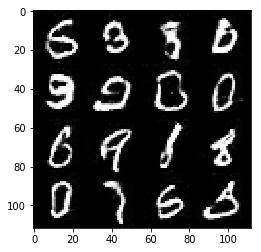

Epoch 2/2... Discriminator Loss: 1.2368... Generator Loss: 0.8161
Epoch 2/2... Discriminator Loss: 1.3964... Generator Loss: 1.3809
Epoch 2/2... Discriminator Loss: 1.3068... Generator Loss: 0.9240


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
Epoch 1/1... Discriminator Loss: 3.9870... Generator Loss: 0.2444
Epoch 1/1... Discriminator Loss: 2.3904... Generator Loss: 3.4066
Epoch 1/1... Discriminator Loss: 3.1524... Generator Loss: 0.0814
Epoch 1/1... Discriminator Loss: 2.3505... Generator Loss: 0.2006
Epoch 1/1... Discriminator Loss: 2.3109... Generator Loss: 0.3197


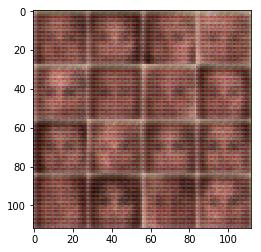

Epoch 1/1... Discriminator Loss: 2.2770... Generator Loss: 0.3102
Epoch 1/1... Discriminator Loss: 1.9963... Generator Loss: 1.4966
Epoch 1/1... Discriminator Loss: 1.9969... Generator Loss: 0.3606
Epoch 1/1... Discriminator Loss: 1.8626... Generator Loss: 0.8238
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.6939


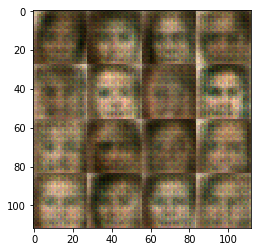

Epoch 1/1... Discriminator Loss: 1.8988... Generator Loss: 1.1543
Epoch 1/1... Discriminator Loss: 1.9638... Generator Loss: 0.2814
Epoch 1/1... Discriminator Loss: 1.7596... Generator Loss: 1.0516
Epoch 1/1... Discriminator Loss: 1.6704... Generator Loss: 0.5284
Epoch 1/1... Discriminator Loss: 2.0942... Generator Loss: 0.3180


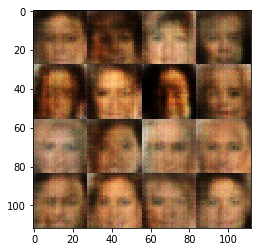

Epoch 1/1... Discriminator Loss: 1.6123... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.8831... Generator Loss: 0.4327
Epoch 1/1... Discriminator Loss: 1.5936... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 1.5422... Generator Loss: 0.5981
Epoch 1/1... Discriminator Loss: 1.5890... Generator Loss: 0.7198


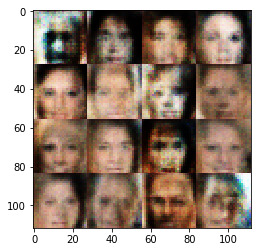

Epoch 1/1... Discriminator Loss: 1.8205... Generator Loss: 0.3460
Epoch 1/1... Discriminator Loss: 1.7923... Generator Loss: 0.3495
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 1.2371
Epoch 1/1... Discriminator Loss: 1.5046... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.8309... Generator Loss: 0.3128


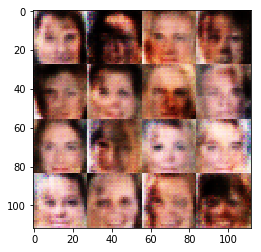

Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.8700
Epoch 1/1... Discriminator Loss: 1.5743... Generator Loss: 1.5878
Epoch 1/1... Discriminator Loss: 1.6621... Generator Loss: 0.4420
Epoch 1/1... Discriminator Loss: 1.2044... Generator Loss: 1.0157
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.5388


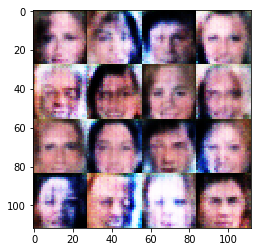

Epoch 1/1... Discriminator Loss: 1.4434... Generator Loss: 1.9649
Epoch 1/1... Discriminator Loss: 1.2382... Generator Loss: 1.3165
Epoch 1/1... Discriminator Loss: 1.5410... Generator Loss: 0.9318
Epoch 1/1... Discriminator Loss: 1.5101... Generator Loss: 0.6150
Epoch 1/1... Discriminator Loss: 1.5315... Generator Loss: 0.4415


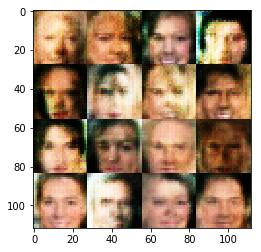

Epoch 1/1... Discriminator Loss: 1.5843... Generator Loss: 0.4000
Epoch 1/1... Discriminator Loss: 1.4567... Generator Loss: 0.4554
Epoch 1/1... Discriminator Loss: 1.6383... Generator Loss: 0.5632
Epoch 1/1... Discriminator Loss: 1.6785... Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 1.8120... Generator Loss: 0.3852


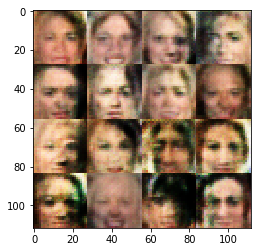

Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.7241
Epoch 1/1... Discriminator Loss: 1.5791... Generator Loss: 0.5173
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 1.9216... Generator Loss: 1.9020
Epoch 1/1... Discriminator Loss: 1.6733... Generator Loss: 0.3765


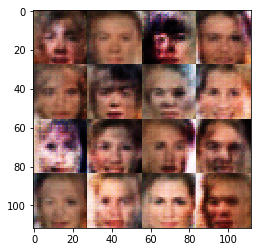

Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 0.9448
Epoch 1/1... Discriminator Loss: 1.6941... Generator Loss: 1.2233
Epoch 1/1... Discriminator Loss: 1.5722... Generator Loss: 0.4876
Epoch 1/1... Discriminator Loss: 1.2509... Generator Loss: 0.8165


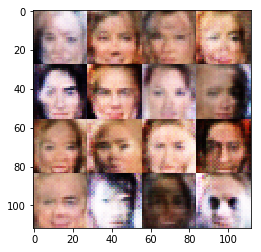

Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.9734
Epoch 1/1... Discriminator Loss: 1.5553... Generator Loss: 0.6341
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.4741
Epoch 1/1... Discriminator Loss: 1.5685... Generator Loss: 0.3956
Epoch 1/1... Discriminator Loss: 1.4541... Generator Loss: 0.4747


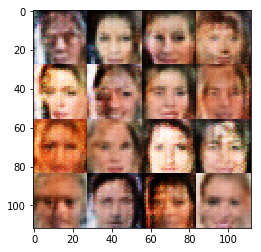

Epoch 1/1... Discriminator Loss: 1.5774... Generator Loss: 1.0122
Epoch 1/1... Discriminator Loss: 1.6376... Generator Loss: 0.4284
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.8554
Epoch 1/1... Discriminator Loss: 1.5197... Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.8513


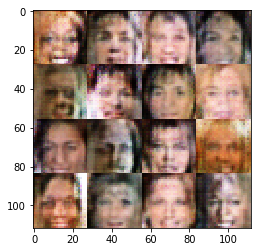

Epoch 1/1... Discriminator Loss: 1.6014... Generator Loss: 0.4131
Epoch 1/1... Discriminator Loss: 1.4361... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 1.1249
Epoch 1/1... Discriminator Loss: 1.5516... Generator Loss: 0.7598
Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 0.8373


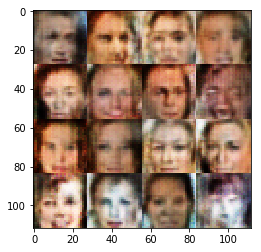

Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.8116
Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 1.4715
Epoch 1/1... Discriminator Loss: 1.2351... Generator Loss: 0.9329
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.6553


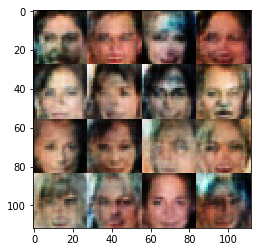

Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.5008
Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 0.5870
Epoch 1/1... Discriminator Loss: 1.6409... Generator Loss: 0.5280
Epoch 1/1... Discriminator Loss: 1.6152... Generator Loss: 0.5042
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.4059


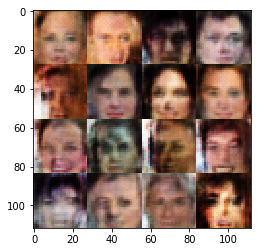

Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 1.0794
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.9126
Epoch 1/1... Discriminator Loss: 1.4887... Generator Loss: 0.5316
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.7888
Epoch 1/1... Discriminator Loss: 1.4792... Generator Loss: 1.1877


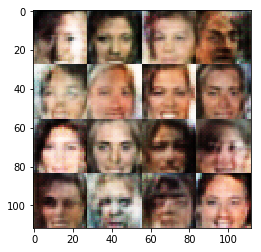

Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.6416... Generator Loss: 1.4343
Epoch 1/1... Discriminator Loss: 1.6269... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 1.6198... Generator Loss: 0.5046
Epoch 1/1... Discriminator Loss: 1.5225... Generator Loss: 0.5968


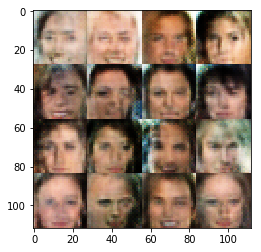

Epoch 1/1... Discriminator Loss: 1.4893... Generator Loss: 0.7181
Epoch 1/1... Discriminator Loss: 1.4667... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.4935... Generator Loss: 0.6590
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.5402... Generator Loss: 0.5276


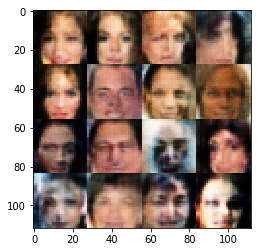

Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 1.7202
Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.5249
Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.5520
Epoch 1/1... Discriminator Loss: 1.4706... Generator Loss: 0.7330
Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.5973


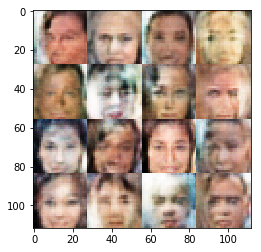

Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.7746
Epoch 1/1... Discriminator Loss: 1.5061... Generator Loss: 0.6305
Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.6549
Epoch 1/1... Discriminator Loss: 1.5238... Generator Loss: 0.6838
Epoch 1/1... Discriminator Loss: 1.5022... Generator Loss: 0.7307


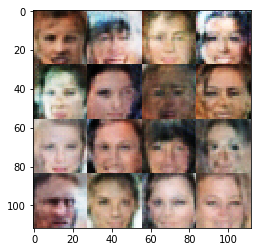

Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.6245
Epoch 1/1... Discriminator Loss: 1.4813... Generator Loss: 0.6329
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.7105
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.6247


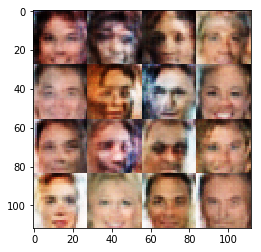

Epoch 1/1... Discriminator Loss: 1.5656... Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.6112
Epoch 1/1... Discriminator Loss: 1.5817... Generator Loss: 0.7478
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.4919... Generator Loss: 0.6843


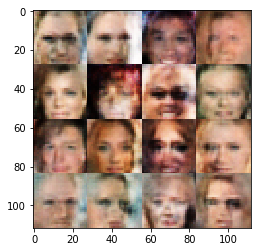

Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.5921... Generator Loss: 0.4226
Epoch 1/1... Discriminator Loss: 1.6713... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.5215... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.5136... Generator Loss: 0.7281


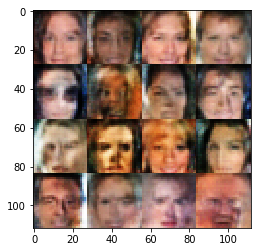

Epoch 1/1... Discriminator Loss: 1.5473... Generator Loss: 0.6578
Epoch 1/1... Discriminator Loss: 1.5555... Generator Loss: 0.6322
Epoch 1/1... Discriminator Loss: 1.4412... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.6007
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.7290


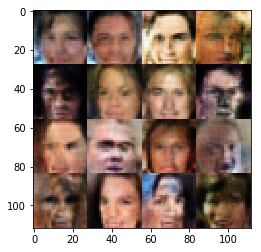

Epoch 1/1... Discriminator Loss: 1.4787... Generator Loss: 0.5818
Epoch 1/1... Discriminator Loss: 1.6123... Generator Loss: 0.4298
Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.8323
Epoch 1/1... Discriminator Loss: 1.5339... Generator Loss: 0.5092
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.5979


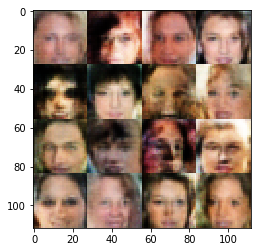

Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.8250
Epoch 1/1... Discriminator Loss: 1.4117... Generator Loss: 0.8319
Epoch 1/1... Discriminator Loss: 1.5059... Generator Loss: 0.5053
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.7811


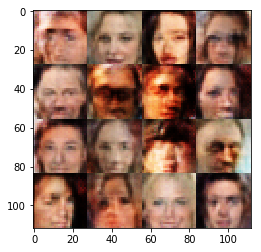

Epoch 1/1... Discriminator Loss: 1.5649... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.5657... Generator Loss: 1.0994
Epoch 1/1... Discriminator Loss: 1.5070... Generator Loss: 0.6808
Epoch 1/1... Discriminator Loss: 1.6490... Generator Loss: 0.4431
Epoch 1/1... Discriminator Loss: 1.4896... Generator Loss: 0.5985


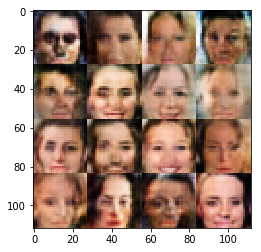

Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.8300
Epoch 1/1... Discriminator Loss: 1.4215... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 1.5585... Generator Loss: 0.6127
Epoch 1/1... Discriminator Loss: 1.4916... Generator Loss: 0.9319
Epoch 1/1... Discriminator Loss: 1.5309... Generator Loss: 0.4689


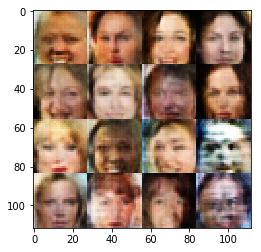

Epoch 1/1... Discriminator Loss: 1.5161... Generator Loss: 0.9949
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.5923... Generator Loss: 0.9487
Epoch 1/1... Discriminator Loss: 1.5558... Generator Loss: 0.5490
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.7128


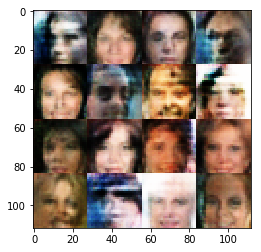

Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.5711
Epoch 1/1... Discriminator Loss: 1.6778... Generator Loss: 0.3816
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.7128
Epoch 1/1... Discriminator Loss: 1.5727... Generator Loss: 0.4629
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.7112


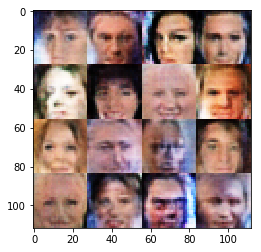

Epoch 1/1... Discriminator Loss: 1.5192... Generator Loss: 0.7283
Epoch 1/1... Discriminator Loss: 1.5328... Generator Loss: 0.5231
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.5659... Generator Loss: 0.5186
Epoch 1/1... Discriminator Loss: 1.7119... Generator Loss: 0.5683


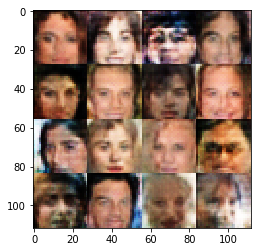

Epoch 1/1... Discriminator Loss: 1.6516... Generator Loss: 1.1497
Epoch 1/1... Discriminator Loss: 1.4607... Generator Loss: 0.6282
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.8923
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.5484... Generator Loss: 0.5351


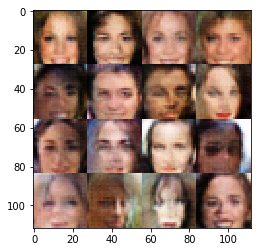

Epoch 1/1... Discriminator Loss: 1.5535... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.8219... Generator Loss: 0.3638
Epoch 1/1... Discriminator Loss: 1.5267... Generator Loss: 0.5312
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.6456... Generator Loss: 0.5365


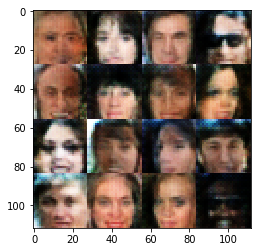

Epoch 1/1... Discriminator Loss: 1.5837... Generator Loss: 0.4891
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7697
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.6633... Generator Loss: 0.4022
Epoch 1/1... Discriminator Loss: 1.6413... Generator Loss: 0.4185


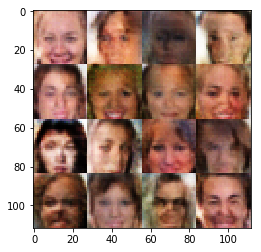

Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.5398
Epoch 1/1... Discriminator Loss: 1.8303... Generator Loss: 0.3007
Epoch 1/1... Discriminator Loss: 1.5670... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.4948... Generator Loss: 0.5333
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.6839


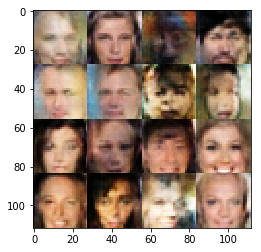

Epoch 1/1... Discriminator Loss: 1.5602... Generator Loss: 0.5088
Epoch 1/1... Discriminator Loss: 1.4580... Generator Loss: 0.5666
Epoch 1/1... Discriminator Loss: 1.5996... Generator Loss: 0.7224
Epoch 1/1... Discriminator Loss: 1.6332... Generator Loss: 0.4088
Epoch 1/1... Discriminator Loss: 1.6520... Generator Loss: 0.3783


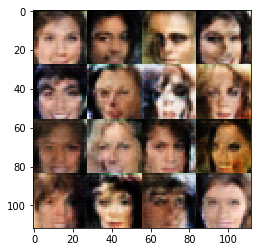

Epoch 1/1... Discriminator Loss: 1.6199... Generator Loss: 0.4300
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.6839... Generator Loss: 0.3890
Epoch 1/1... Discriminator Loss: 1.6541... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.6543... Generator Loss: 0.7538


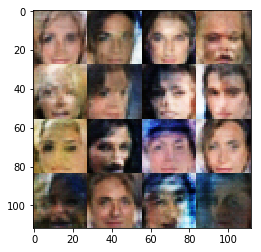

Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 0.5904
Epoch 1/1... Discriminator Loss: 1.8114... Generator Loss: 0.2984
Epoch 1/1... Discriminator Loss: 1.6641... Generator Loss: 0.4404
Epoch 1/1... Discriminator Loss: 1.5755... Generator Loss: 0.4875
Epoch 1/1... Discriminator Loss: 1.7368... Generator Loss: 0.3619


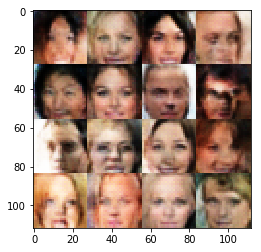

Epoch 1/1... Discriminator Loss: 1.4707... Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 1.8345... Generator Loss: 0.3058
Epoch 1/1... Discriminator Loss: 1.5561... Generator Loss: 0.5093
Epoch 1/1... Discriminator Loss: 1.5166... Generator Loss: 0.5251
Epoch 1/1... Discriminator Loss: 1.5891... Generator Loss: 0.4276


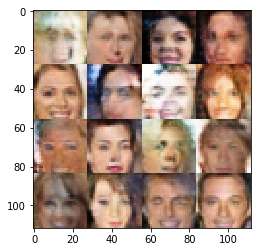

Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.4203... Generator Loss: 0.6102
Epoch 1/1... Discriminator Loss: 1.4820... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 1.5533... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.5147... Generator Loss: 0.4995


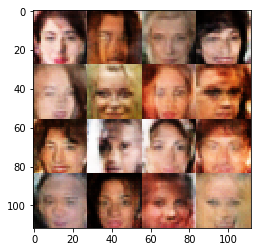

Epoch 1/1... Discriminator Loss: 1.9151... Generator Loss: 0.2565
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.6194
Epoch 1/1... Discriminator Loss: 1.7016... Generator Loss: 0.5025
Epoch 1/1... Discriminator Loss: 1.6889... Generator Loss: 0.4897
Epoch 1/1... Discriminator Loss: 1.7340... Generator Loss: 0.3444


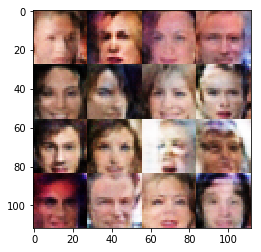

Epoch 1/1... Discriminator Loss: 1.8514... Generator Loss: 0.3361
Epoch 1/1... Discriminator Loss: 1.6836... Generator Loss: 0.4402
Epoch 1/1... Discriminator Loss: 1.4865... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 1.6124... Generator Loss: 0.5990
Epoch 1/1... Discriminator Loss: 1.6740... Generator Loss: 0.4171


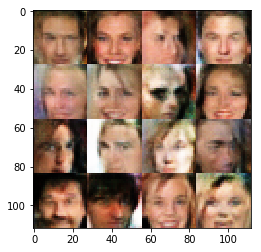

Epoch 1/1... Discriminator Loss: 1.5882... Generator Loss: 0.8950
Epoch 1/1... Discriminator Loss: 1.5945... Generator Loss: 0.5569
Epoch 1/1... Discriminator Loss: 1.5570... Generator Loss: 0.5849
Epoch 1/1... Discriminator Loss: 1.5199... Generator Loss: 0.5482
Epoch 1/1... Discriminator Loss: 1.6955... Generator Loss: 0.3767


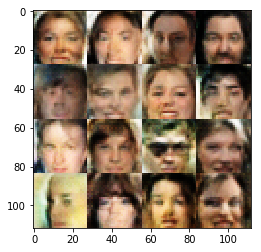

Epoch 1/1... Discriminator Loss: 1.5125... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.5702... Generator Loss: 0.5503
Epoch 1/1... Discriminator Loss: 1.6433... Generator Loss: 0.4810
Epoch 1/1... Discriminator Loss: 1.8306... Generator Loss: 0.3038
Epoch 1/1... Discriminator Loss: 1.6368... Generator Loss: 0.4097


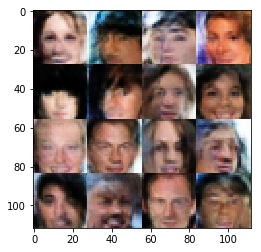

Epoch 1/1... Discriminator Loss: 1.6055... Generator Loss: 0.8591
Epoch 1/1... Discriminator Loss: 1.4818... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.5470... Generator Loss: 0.4666
Epoch 1/1... Discriminator Loss: 1.7325... Generator Loss: 0.3378
Epoch 1/1... Discriminator Loss: 1.5984... Generator Loss: 0.6207


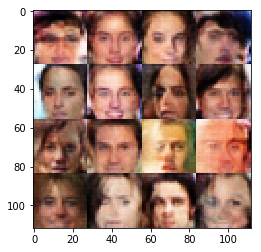

Epoch 1/1... Discriminator Loss: 1.7257... Generator Loss: 0.3489
Epoch 1/1... Discriminator Loss: 1.7746... Generator Loss: 0.3390
Epoch 1/1... Discriminator Loss: 1.5046... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.6587... Generator Loss: 0.4505
Epoch 1/1... Discriminator Loss: 1.6076... Generator Loss: 0.5434


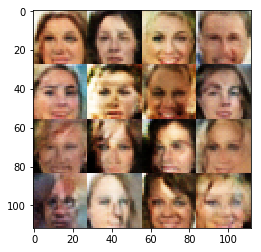

Epoch 1/1... Discriminator Loss: 1.5100... Generator Loss: 0.5414
Epoch 1/1... Discriminator Loss: 1.6391... Generator Loss: 0.5021
Epoch 1/1... Discriminator Loss: 1.4449... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.5517... Generator Loss: 0.5135


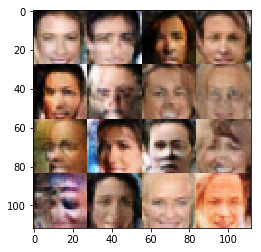

Epoch 1/1... Discriminator Loss: 1.5829... Generator Loss: 0.5408
Epoch 1/1... Discriminator Loss: 1.5958... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.5633... Generator Loss: 0.5111
Epoch 1/1... Discriminator Loss: 1.4690... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.7612... Generator Loss: 0.3195


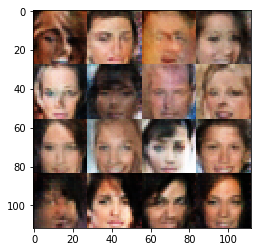

Epoch 1/1... Discriminator Loss: 1.7181... Generator Loss: 1.3747
Epoch 1/1... Discriminator Loss: 1.6900... Generator Loss: 0.4582
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.5899
Epoch 1/1... Discriminator Loss: 1.5519... Generator Loss: 0.4926
Epoch 1/1... Discriminator Loss: 1.5612... Generator Loss: 0.4636


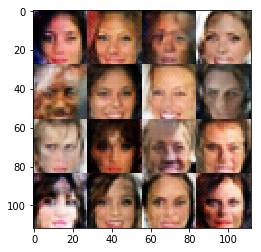

Epoch 1/1... Discriminator Loss: 1.6064... Generator Loss: 0.5231
Epoch 1/1... Discriminator Loss: 1.5508... Generator Loss: 0.5463
Epoch 1/1... Discriminator Loss: 1.6017... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.6081... Generator Loss: 0.4593
Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 0.5515


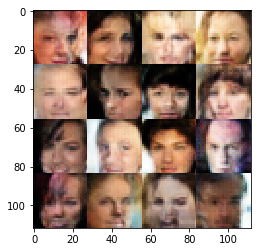

Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.7027... Generator Loss: 0.4962
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.4969... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.5171... Generator Loss: 0.5734


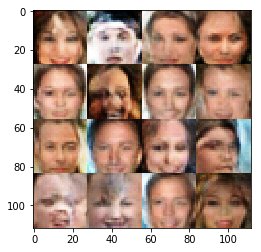

Epoch 1/1... Discriminator Loss: 1.5880... Generator Loss: 0.4834
Epoch 1/1... Discriminator Loss: 1.7582... Generator Loss: 0.3153
Epoch 1/1... Discriminator Loss: 1.9857... Generator Loss: 0.2427
Epoch 1/1... Discriminator Loss: 1.4623... Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.8067... Generator Loss: 0.2947


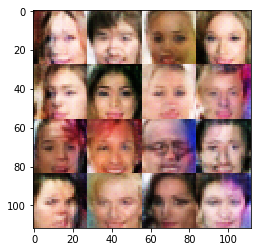

Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.7349... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.5220... Generator Loss: 0.4216
Epoch 1/1... Discriminator Loss: 1.6104... Generator Loss: 0.4844
Epoch 1/1... Discriminator Loss: 1.6390... Generator Loss: 0.4042


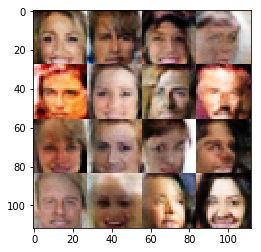

Epoch 1/1... Discriminator Loss: 1.7282... Generator Loss: 0.3471
Epoch 1/1... Discriminator Loss: 1.4805... Generator Loss: 1.0357
Epoch 1/1... Discriminator Loss: 1.5119... Generator Loss: 0.5351
Epoch 1/1... Discriminator Loss: 1.4990... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.9025... Generator Loss: 0.2579


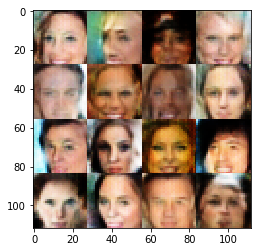

Epoch 1/1... Discriminator Loss: 1.5884... Generator Loss: 0.5468
Epoch 1/1... Discriminator Loss: 1.6443... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 2.0682... Generator Loss: 0.2233
Epoch 1/1... Discriminator Loss: 1.8032... Generator Loss: 0.3093
Epoch 1/1... Discriminator Loss: 1.5054... Generator Loss: 0.9280


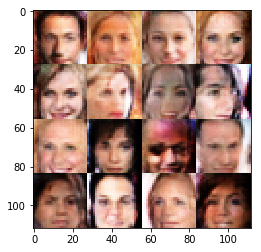

Epoch 1/1... Discriminator Loss: 1.4706... Generator Loss: 0.6141
Epoch 1/1... Discriminator Loss: 1.8594... Generator Loss: 0.3007
Epoch 1/1... Discriminator Loss: 1.5343... Generator Loss: 0.4455
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.5442
Epoch 1/1... Discriminator Loss: 1.4614... Generator Loss: 0.5544


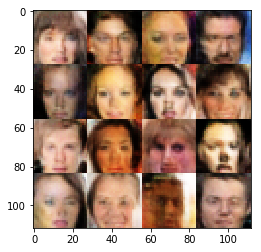

Epoch 1/1... Discriminator Loss: 1.7591... Generator Loss: 0.3241
Epoch 1/1... Discriminator Loss: 2.1163... Generator Loss: 0.2009
Epoch 1/1... Discriminator Loss: 1.9565... Generator Loss: 0.2560
Epoch 1/1... Discriminator Loss: 1.5419... Generator Loss: 0.4409
Epoch 1/1... Discriminator Loss: 1.5661... Generator Loss: 0.4712


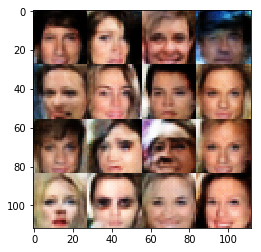

Epoch 1/1... Discriminator Loss: 1.6853... Generator Loss: 0.4195
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.8647
Epoch 1/1... Discriminator Loss: 1.9264... Generator Loss: 0.2696
Epoch 1/1... Discriminator Loss: 1.6122... Generator Loss: 0.5103
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.6713


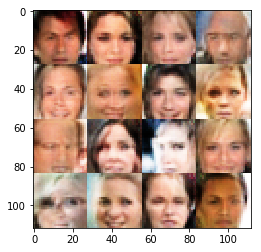

Epoch 1/1... Discriminator Loss: 1.7167... Generator Loss: 0.3673
Epoch 1/1... Discriminator Loss: 1.9369... Generator Loss: 0.2733
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 1.5954... Generator Loss: 0.3958
Epoch 1/1... Discriminator Loss: 1.4124... Generator Loss: 0.7889


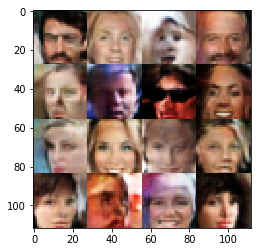

Epoch 1/1... Discriminator Loss: 1.7647... Generator Loss: 0.3622
Epoch 1/1... Discriminator Loss: 1.6114... Generator Loss: 0.4124
Epoch 1/1... Discriminator Loss: 1.6451... Generator Loss: 0.4037
Epoch 1/1... Discriminator Loss: 1.8821... Generator Loss: 0.2756
Epoch 1/1... Discriminator Loss: 1.4230... Generator Loss: 0.7453


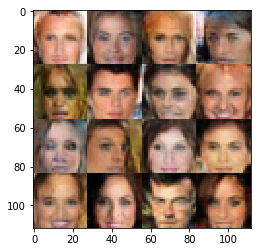

Epoch 1/1... Discriminator Loss: 1.7172... Generator Loss: 0.4834
Epoch 1/1... Discriminator Loss: 1.5064... Generator Loss: 0.7931
Epoch 1/1... Discriminator Loss: 1.7161... Generator Loss: 0.3449
Epoch 1/1... Discriminator Loss: 1.5150... Generator Loss: 0.5730
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.5908


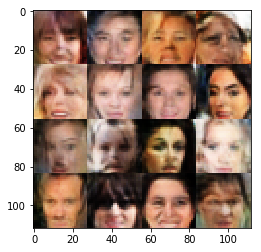

Epoch 1/1... Discriminator Loss: 1.8137... Generator Loss: 0.3100
Epoch 1/1... Discriminator Loss: 1.5330... Generator Loss: 0.6387
Epoch 1/1... Discriminator Loss: 1.5392... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.5534... Generator Loss: 0.4934
Epoch 1/1... Discriminator Loss: 1.7151... Generator Loss: 0.5576


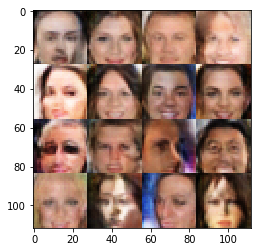

Epoch 1/1... Discriminator Loss: 1.6024... Generator Loss: 0.4306
Epoch 1/1... Discriminator Loss: 1.7631... Generator Loss: 0.4248
Epoch 1/1... Discriminator Loss: 1.5586... Generator Loss: 0.4844
Epoch 1/1... Discriminator Loss: 1.5462... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.8117... Generator Loss: 0.3447


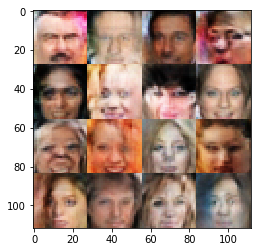

Epoch 1/1... Discriminator Loss: 1.6507... Generator Loss: 0.4098
Epoch 1/1... Discriminator Loss: 1.6667... Generator Loss: 0.3710
Epoch 1/1... Discriminator Loss: 1.6047... Generator Loss: 0.4369
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.5953
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.4782


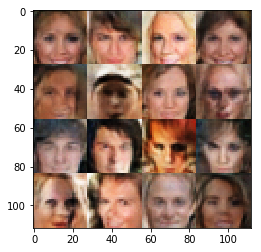

Epoch 1/1... Discriminator Loss: 1.8845... Generator Loss: 0.2876
Epoch 1/1... Discriminator Loss: 1.6025... Generator Loss: 0.5104
Epoch 1/1... Discriminator Loss: 1.6588... Generator Loss: 0.3783
Epoch 1/1... Discriminator Loss: 1.6187... Generator Loss: 0.4806
Epoch 1/1... Discriminator Loss: 1.7097... Generator Loss: 0.5658


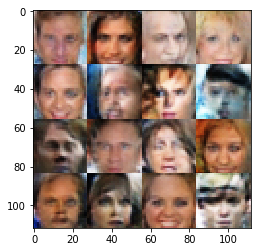

Epoch 1/1... Discriminator Loss: 1.7266... Generator Loss: 0.4241
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.5174
Epoch 1/1... Discriminator Loss: 1.6362... Generator Loss: 0.3745
Epoch 1/1... Discriminator Loss: 1.6516... Generator Loss: 0.4597
Epoch 1/1... Discriminator Loss: 1.7536... Generator Loss: 0.3905


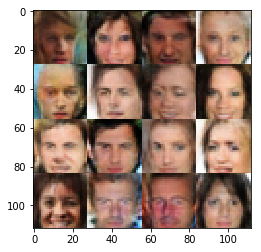

Epoch 1/1... Discriminator Loss: 1.8435... Generator Loss: 0.3216
Epoch 1/1... Discriminator Loss: 1.7444... Generator Loss: 0.4449
Epoch 1/1... Discriminator Loss: 1.5533... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 1.6687... Generator Loss: 0.4605
Epoch 1/1... Discriminator Loss: 1.5807... Generator Loss: 0.7813


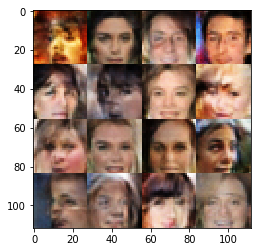

Epoch 1/1... Discriminator Loss: 1.6578... Generator Loss: 0.3887
Epoch 1/1... Discriminator Loss: 1.5632... Generator Loss: 0.4274
Epoch 1/1... Discriminator Loss: 1.6031... Generator Loss: 0.4896
Epoch 1/1... Discriminator Loss: 1.8701... Generator Loss: 0.2795
Epoch 1/1... Discriminator Loss: 1.8419... Generator Loss: 0.3383


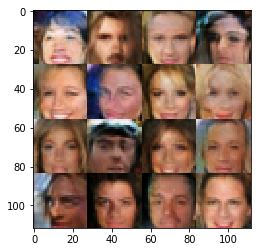

Epoch 1/1... Discriminator Loss: 1.6970... Generator Loss: 0.4110
Epoch 1/1... Discriminator Loss: 1.8989... Generator Loss: 0.2761
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.8751
Epoch 1/1... Discriminator Loss: 1.7813... Generator Loss: 0.3203
Epoch 1/1... Discriminator Loss: 1.5504... Generator Loss: 0.4903


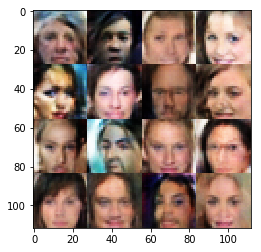

Epoch 1/1... Discriminator Loss: 1.6669... Generator Loss: 0.4522
Epoch 1/1... Discriminator Loss: 1.7644... Generator Loss: 0.4288
Epoch 1/1... Discriminator Loss: 1.8136... Generator Loss: 0.3109
Epoch 1/1... Discriminator Loss: 1.9674... Generator Loss: 0.2466
Epoch 1/1... Discriminator Loss: 1.8722... Generator Loss: 0.3060


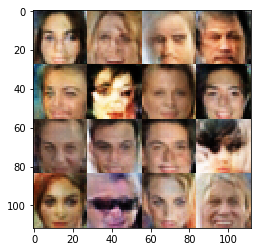

Epoch 1/1... Discriminator Loss: 1.8428... Generator Loss: 0.3268
Epoch 1/1... Discriminator Loss: 1.5590... Generator Loss: 0.4604
Epoch 1/1... Discriminator Loss: 1.7509... Generator Loss: 0.3527
Epoch 1/1... Discriminator Loss: 1.5215... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.6708... Generator Loss: 0.3972


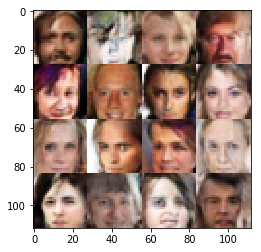

Epoch 1/1... Discriminator Loss: 1.6309... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 1.6554... Generator Loss: 0.4384
Epoch 1/1... Discriminator Loss: 1.7462... Generator Loss: 0.3777
Epoch 1/1... Discriminator Loss: 1.6266... Generator Loss: 0.5766
Epoch 1/1... Discriminator Loss: 1.6135... Generator Loss: 0.4120


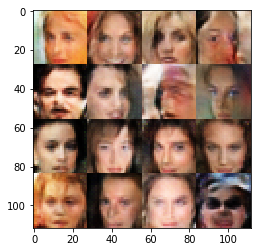

Epoch 1/1... Discriminator Loss: 1.7491... Generator Loss: 0.3717
Epoch 1/1... Discriminator Loss: 1.5369... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.6552... Generator Loss: 0.3903
Epoch 1/1... Discriminator Loss: 1.6116... Generator Loss: 0.4614
Epoch 1/1... Discriminator Loss: 1.5714... Generator Loss: 0.4831


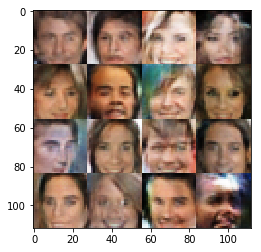

Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.5477
Epoch 1/1... Discriminator Loss: 1.5979... Generator Loss: 0.4114
Epoch 1/1... Discriminator Loss: 1.5777... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.5929... Generator Loss: 0.4665
Epoch 1/1... Discriminator Loss: 1.5173... Generator Loss: 0.5791


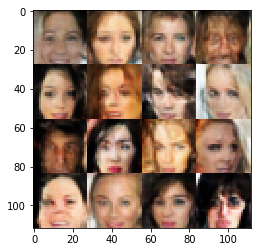

Epoch 1/1... Discriminator Loss: 1.6782... Generator Loss: 0.3695


KeyboardInterrupt: 

In [ ]:
batch_size = 48
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.